In [88]:
import seaborn as sns

In [89]:
import matplotlib.pyplot as plt

In [90]:
#import packages 
import pandas as pd
import numpy as np

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)

# Set the maximum width of the display
pd.set_option('display.width', None)

In [91]:
#import csv as dataframe
df = pd.read_csv('airbnb.csv')

In [92]:
# take a look at the df
df.head(5)

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [93]:
# note that we have an Unnamed: 0 column, we have some nulls in column 5 host_name and column 21 checkin, and many nulls in column 22 checkout. 
# also, Column 11 hourse_rules should be house_rules, and column 18 toiles should be toilets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12805 entries, 0 to 12804
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    12805 non-null  int64  
 1   id            12805 non-null  int64  
 2   name          12805 non-null  object 
 3   rating        12805 non-null  object 
 4   reviews       12805 non-null  object 
 5   host_name     12797 non-null  object 
 6   host_id       12805 non-null  float64
 7   address       12805 non-null  object 
 8   features      12805 non-null  object 
 9   amenities     12805 non-null  object 
 10  safety_rules  12805 non-null  object 
 11  hourse_rules  12805 non-null  object 
 12  img_links     12805 non-null  object 
 13  price         12805 non-null  int64  
 14  country       12805 non-null  object 
 15  bathrooms     12805 non-null  int64  
 16  beds          12805 non-null  int64  
 17  guests        12805 non-null  int64  
 18  toiles        12805 non-nu

In [94]:
# drop the column with Unnamed: 0
df.drop(columns='Unnamed: 0', inplace = True)

# rename column 11 hourse_rules to house_rules
df.rename({'hourse_rules':'house_rules'}, axis = 1, inplace = True)
df.rename({'toiles':'toilets'}, axis = 1, inplace = True)


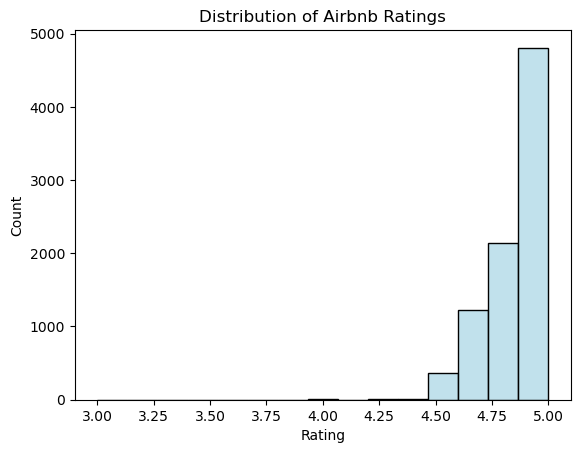

In [95]:
#let's plot a few simple histograms to have a rough sense of the data

# first let's look at the distribution of airbnb ratings

# make a new column rating_numeric that will have the ratings as numeric. the listings that are new do not have a rating, but have 'New' in this column instead.
df['rating_numeric'] = pd.to_numeric(df['rating'], errors='coerce')

# create plot
sns.histplot(df['rating_numeric'], bins = 15, color = 'lightblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Airbnb Ratings')
plt.show()

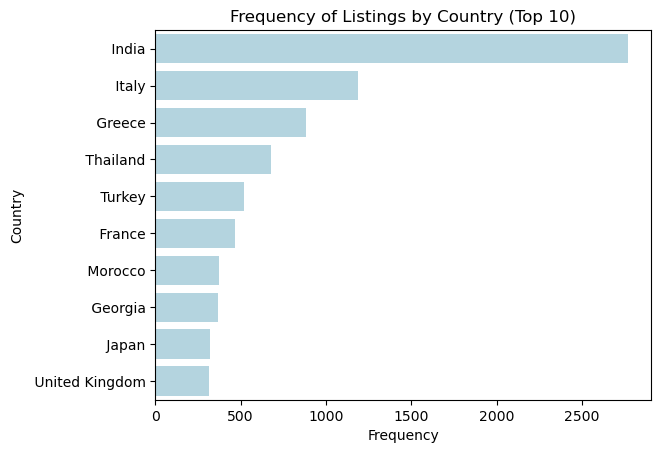

In [96]:
# typing the country as categories
df['country'] = df['country'].astype('category')

# pulling out the top 10 countries that have the most listings
top_10_countries = df['country'].value_counts().index[:10]

# filtering out the main df to only those rows whose country is in the top 10 countries
df_top_10_countries = df[df['country'].isin(top_10_countries)]

# create a countplot
sns.countplot(y='country', data=df_top_10_countries, order=top_10_countries, color = 'lightblue')
plt.xlabel('Frequency')
plt.ylabel('Country')
plt.title('Frequency of Listings by Country (Top 10)')
plt.show()

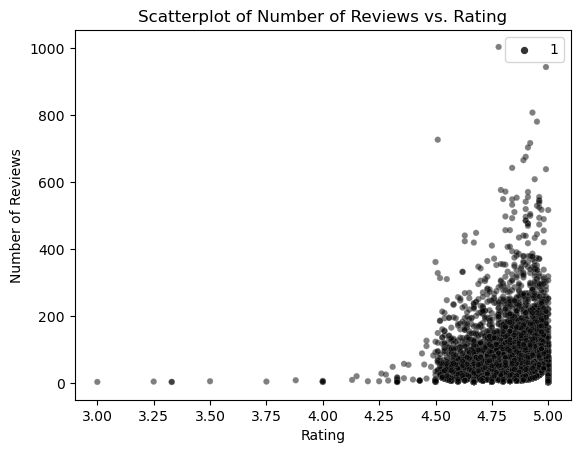

In [97]:
# we now want to look at the scatterplot between reviews and ratings. We need to make the reviews column an integer, but ran into issues as there was a value "1,003". 
# we thus replace it with "1003", and then type the column as int
df[df['reviews'] == '1,003']
df['reviews'] = df['reviews'].replace('1,003', '1003')
df['reviews'] = df['reviews'].astype(str).astype(int)

# create scatterplot
sns.scatterplot(x = 'rating_numeric', y = 'reviews', data = df, color = 'black', alpha = 0.5, edgecolor = 'gray', size = 1)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Scatterplot of Number of Reviews vs. Rating')
plt.show()

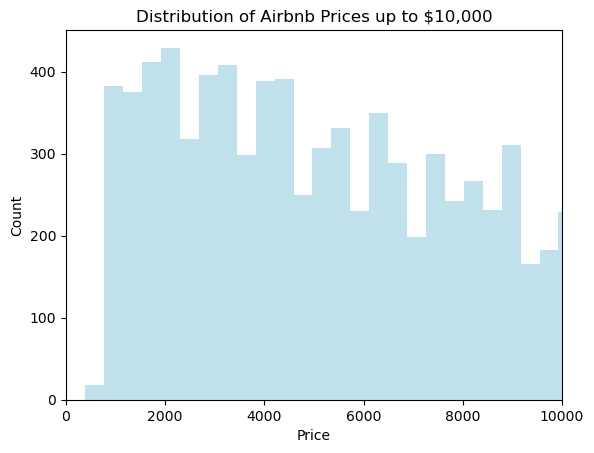

In [98]:
# see distribution of airbnb prices up to $10,000
sns.histplot(df['price'], bins = 5000, color = 'lightblue')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xlim(0,10000)
plt.title('Distribution of Airbnb Prices up to $10,000')
plt.show()

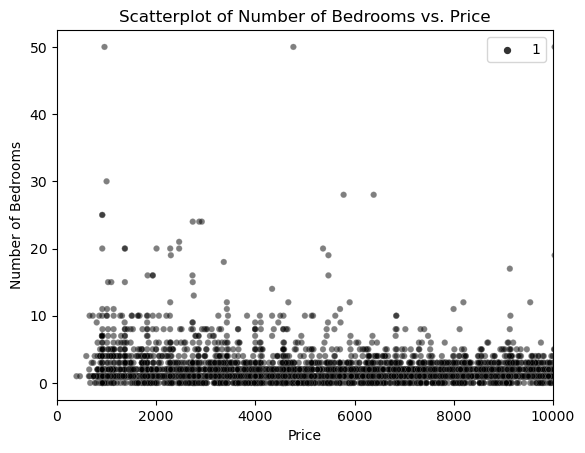

In [102]:
# create scatterplot of number of bedrooms vs. price
sns.scatterplot(x = 'price', y = 'bedrooms', data = df, color = 'black', alpha = 0.5, edgecolor = 'gray', size = 1)
plt.xlim(0,10000)
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.title('Scatterplot of Number of Bedrooms vs. Price')
plt.show()